In [2]:
import pandas as pd  
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt     
import seaborn as sns    
from mlxtend.plotting import plot_decision_regions 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Diabetes data set
This data set is from Kaggle (https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

From Kaggle:
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In Part 2, you will use decision trees to predict if a patient has diabetes using the data.

In [3]:
diabetes = pd.read_csv('diabetes.csv')

## Lab 2 Assignment

## Part 1: Classifying irises

1. Use seaborn to load the iris data set and make a pair plot of the data with hue showing the species.

2. Choose one of the pairs of features you used last week to predict species. Make a train-test split using 30% of the data for a test set. Don't forget to convert the species labels to integers.

3. Use decision trees with max depth = 2, 3, ..., 15 and record the accuracy on the training set and the test set. Make a visualization of these scores.

4. Based on your work in 3, set the maximum depth and train a model with your training data. Check the accuracy score on both the training set and the test set. Use mlxtend.plot_decision_regions( ) to plot the decision regions for the training set and the test set.

## Part 2: Diabetes prediction

1. Define y to be the Outcome column and define X to be the other columns. Make a train-test split using 30% of the data for a test set. 

2. Use decision trees with max depth = 2, 3, ..., 15 and record the accuracy on the training set and the test set. Make a visualization of these scores.

3. Based on your work in 3, set the maximum depth and train a model with your training data. Check the accuracy score on both the training set and the test set.

4. Use the feature_importances_ property of DecisionTreeClassifier() to make a data frame showing the importance of each feature. What two features are the most important in this tree?

5. Train a decision tree classifier using only the two most important features.

6. Use mlxtend.plot_decision_regions( ) to plot the decision regions for the training set and the test set.

## Part 3: Predicting sprint times

1. We will use a decision tree model to predict 40 yd sprint time from weight and height using data from the 2009-2019 NFL drafts. Load the data contained in 'NFL_draft_combine_2009_2019.csv'. Use $\textit{nfl = nfl.dropna(subset='Sprint_40yd', axis=0)}$ to drop the rows with no values for 'Sprint_40yd'. Define X to be the weight and height columns and y as the 'Sprint_40yd' column. Make a train-test split.

2. Use decision trees with max depth = 2, 3, ..., 15 and record the $r^2$ scores for the training set and the test set. Make a visualization of these scores.

3. Based on your work in 3, set the maximum depth and train a model with your training data. Check the $r^2$ score on both the training set and the test set.

4. Make a dataframe showing the importance of each feature using feature_importances_. What feature is the most important in this tree?

# Part 1

In [4]:
iris = sns.load_dataset('iris') # This dataset about irises is included in seaborn.
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


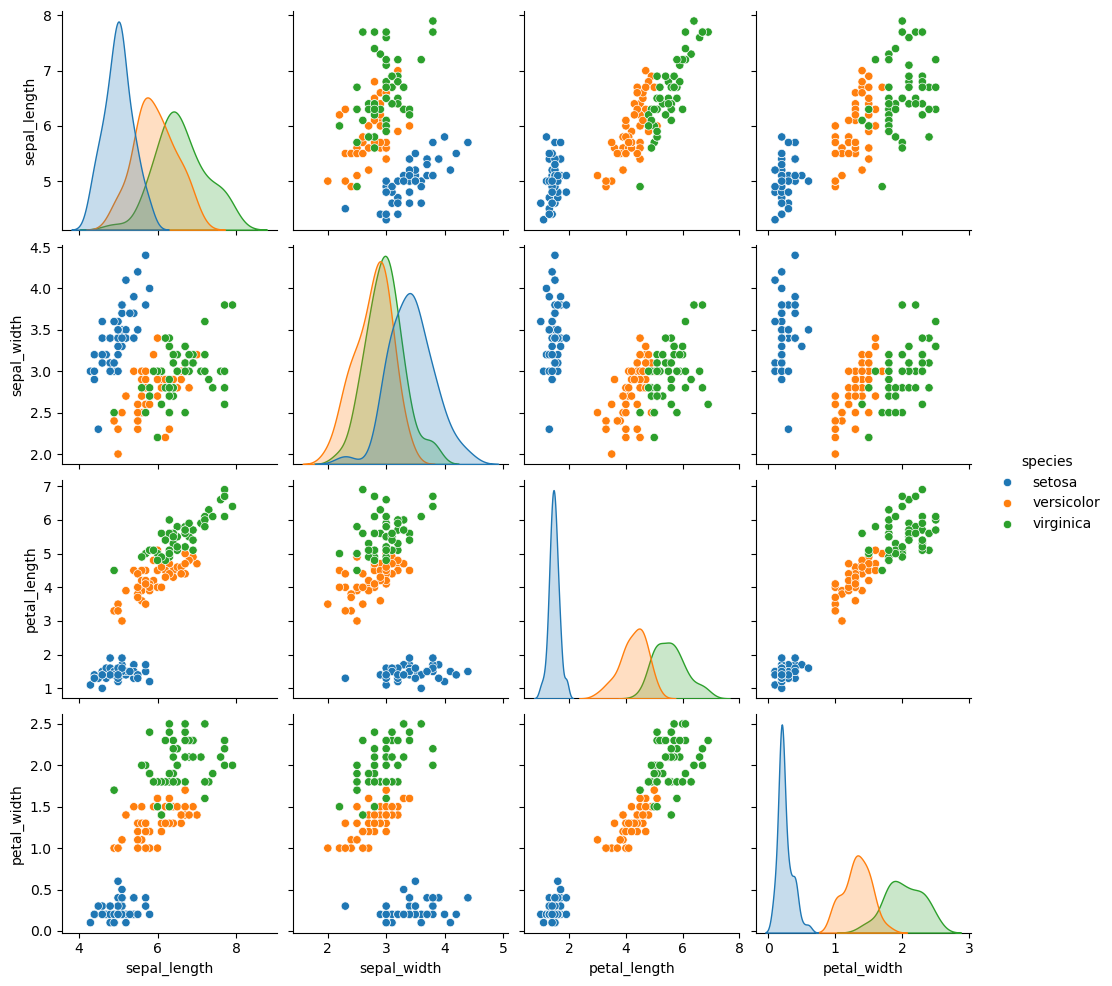

In [5]:
#1
sns.pairplot(iris, hue='species')
plt.show()

In [6]:
#2
'''
Choose one of the pairs of features you used last week to predict species. Make a train-test split using 30% of the data for a test set. 
Don't forget to convert the species labels to integers.
'''

species_dict = {
    'setosa' : 0,
    'versicolor' : 1,
    'virginica' :2
}
iris['species_label'] = iris['species'].map(species_dict)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [7]:
X = iris[['sepal_width', 'petal_width']]
y = iris['species_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440) 

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['sepal_width', 'petal_width'])
X_test = pd.DataFrame(scaler.transform(X_test), columns = ['sepal_width', 'petal_width'])

In [8]:
#3
'''
Use decision trees with max depth = 2, 3, ..., 15 and record the accuracy on the training set and the test set. 
Make a visualization of these scores.
'''

dt = DecisionTreeClassifier(random_state=290)

In [9]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=290)

In [10]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 290,
 'splitter': 'best'}

In [11]:
dt.score(X_train, y_train)

0.9809523809523809

In [12]:
dt.score(X_test, y_test)

0.8888888888888888

In [13]:
dt.get_depth()

7

In [14]:
train_accuracies = {}
test_accuracies = {}
depth = range(1,16)
for n in depth:
    clf = DecisionTreeClassifier(max_depth = n, random_state=290)
    clf.fit(X_train, y_train)
    train_accuracies[n] = clf.score(X_train, y_train)
    test_accuracies[n] = clf.score(X_test, y_test)

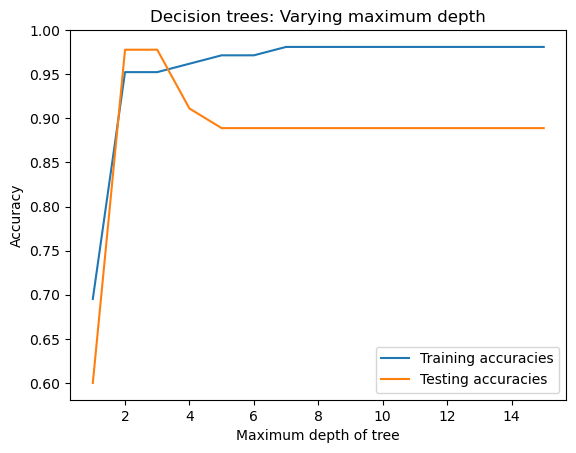

In [15]:
fig, ax = plt.subplots()
ax.plot(depth, train_accuracies.values(), 
        label='Training accuracies')
ax.plot(depth, test_accuracies.values(), 
        label='Testing accuracies')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision trees: Varying maximum depth')
plt.legend()
plt.show()

In [16]:
#4
'''
Based on your work in 3, set the maximum depth and train a model with your training data. 
Check the accuracy score on both the training set and the test set. 
Use mlxtend.plot_decision_regions( ) to plot the decision regions for the training set and the test set.
'''
dt = DecisionTreeClassifier(max_depth = 2, 
                            random_state=290)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=290)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


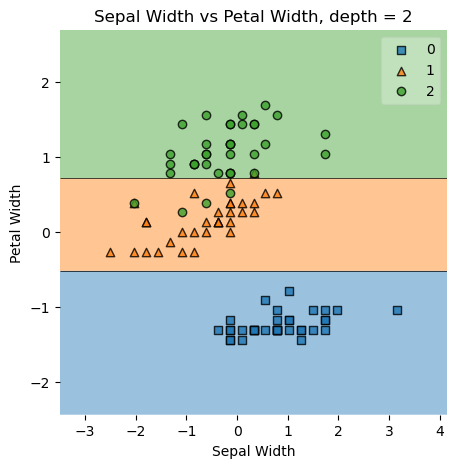

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
plot_decision_regions(X_train.values, 
                      y_train.values, 
                      clf=dt, legend=1, ax=ax)

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.title('Sepal Width vs Petal Width, depth = 2')
plt.show()

In [18]:
dt.score(X_train, y_train)

0.9523809523809523

In [19]:
dt.score(X_test, y_test)

0.9777777777777777

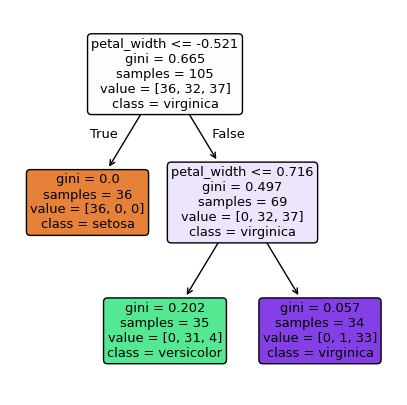

In [20]:
plt.figure(figsize=(5, 5))
plot_tree(dt, 
          feature_names=['sepal_width', 'petal_width'], 
          class_names=['setosa', 'versicolor', 'virginica'], 
          filled=True, 
          rounded=True,
          max_depth=15)
plt.show()

# Part 2

In [21]:
#1
'''
Define y to be the Outcome column and define X to be the other columns.
Make a train-test split using 30% of the data for a test set.
'''
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
X2 = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y2 = diabetes['Outcome']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=440) 

scaler = StandardScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train2), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                                                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test2 = pd.DataFrame(scaler.transform(X_test2), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                                           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [23]:
#2
'''
Use decision trees with max depth = 2, 3, ..., 15 and record the accuracy on the training set and the test set. 
Make a visualization of these scores.
'''
dt2 = DecisionTreeClassifier(random_state=290)

In [24]:
dt2.fit(X_train2,y_train2)

DecisionTreeClassifier(random_state=290)

In [25]:
dt2.score(X_train2, y_train2)

1.0

In [26]:
dt2.score(X_test2, y_test2)

0.7575757575757576

In [27]:
dt2.get_depth()

13

In [28]:
train_accuracies2 = {}
test_accuracies2 = {}
depth = range(1,16)
for n in depth:
    clf = DecisionTreeClassifier(max_depth = n, random_state=290)
    clf.fit(X_train2, y_train2)
    train_accuracies2[n] = clf.score(X_train2, y_train2)
    test_accuracies2[n] = clf.score(X_test2, y_test2)

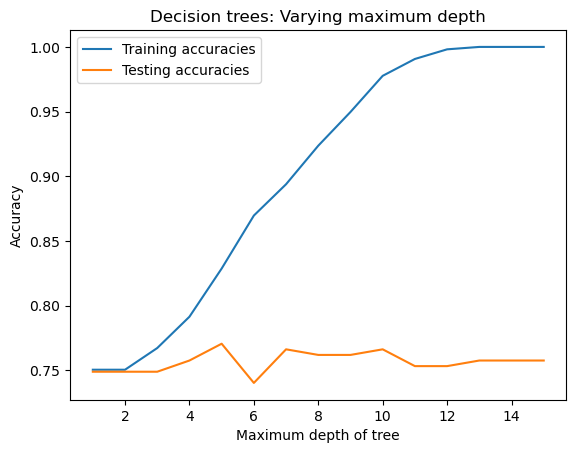

In [29]:
fig, ax = plt.subplots()
ax.plot(depth, train_accuracies2.values(), 
        label='Training accuracies')
ax.plot(depth, test_accuracies2.values(), 
        label='Testing accuracies')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision trees: Varying maximum depth')
plt.legend()
plt.show()

In [30]:
#3
'''
Based on your work in 2, set the maximum depth and train a model with your training data. 
Check the accuracy score on both the training set and the test set.
'''
dt2 = DecisionTreeClassifier(max_depth = 5, 
                            random_state=290)
dt2.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=5, random_state=290)

In [31]:
dt2.score(X_train2, y_train2)

0.8286778398510242

In [32]:
dt2.score(X_test2, y_test2)

0.7705627705627706

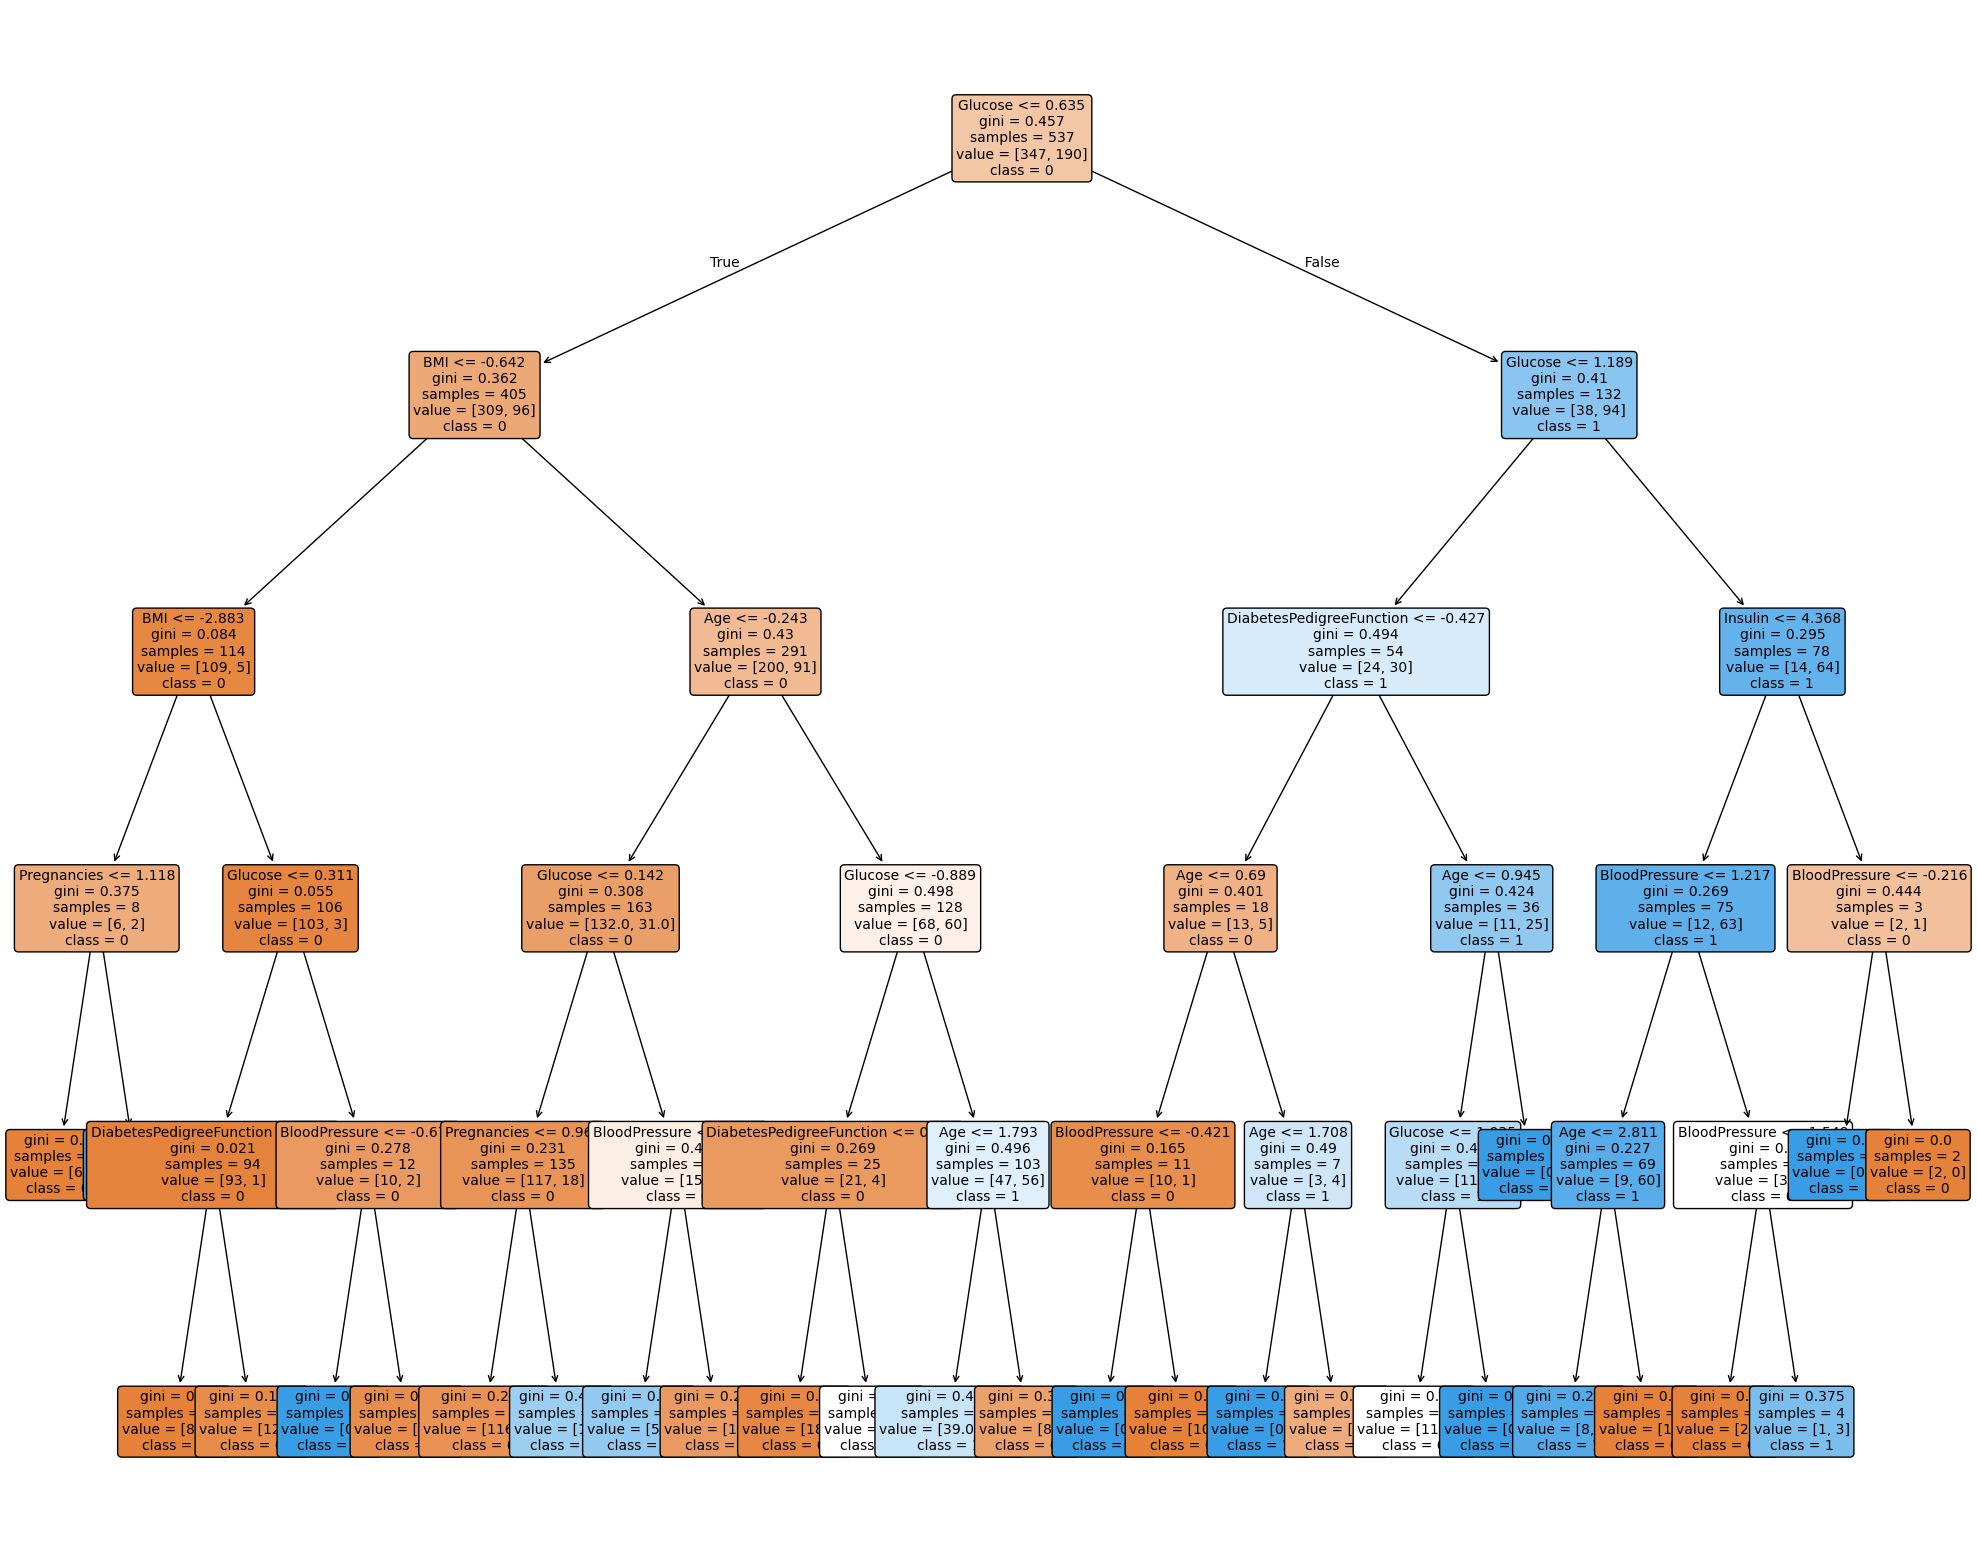

In [33]:
plt.figure(figsize=(25, 20))
plot_tree(dt2, 
          feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], 
          class_names=['0', '1'], 
          filled=True, 
          rounded=True,
          max_depth=5,
          fontsize=10)
plt.show()

In [34]:
#4
'''
Use the feature_importances_ property of DecisionTreeClassifier() to make a data frame showing the importance of each feature. 
What two features are the most important in this tree?
'''
dt2.feature_importances_

array([0.03930978, 0.52433922, 0.0943902 , 0.        , 0.01226833,
       0.10414885, 0.05073334, 0.17481028])

In [35]:
feat_imp = pd.DataFrame(X_train2.columns, columns=['feature'])
feat_imp['importance'] = dt2.feature_importances_
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
feat_imp

,feature,importance
1,Glucose,0.524339
7,Age,0.174810
5,BMI,0.104149
2,BloodPressure,0.094390
6,DiabetesPedigreeFunction,0.050733
0,Pregnancies,0.039310
4,Insulin,0.012268
3,SkinThickness,0.000000


In [36]:
# The most important features are Glucose levels and age

In [37]:
'''
5. Train a decision tree classifier using only the two most important features.

6. Use mlxtend.plot_decision_regions( ) to plot the decision regions for the training set and the test set.
'''
X2 = diabetes[[ 'Glucose', 'Age']]
y2 = diabetes['Outcome']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=440) 

scaler = StandardScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train2), columns = ['Glucose', 'Age'])
X_test2 = pd.DataFrame(scaler.transform(X_test2), columns = [ 'Glucose', 'Age'])
dt2 = DecisionTreeClassifier(random_state=290)
dt2.fit(X_train2,y_train2)

DecisionTreeClassifier(random_state=290)

In [38]:
dt2.score(X_train2, y_train2)

0.9776536312849162

In [39]:
dt2.score(X_test2, y_test2)

0.683982683982684

In [40]:
dt2.get_depth()

21

In [41]:
train_accuracies2 = {}
test_accuracies2 = {}
depth = range(1,22)
for n in depth:
    clf = DecisionTreeClassifier(max_depth = n, random_state=290)
    clf.fit(X_train2, y_train2)
    train_accuracies2[n] = clf.score(X_train2, y_train2)
    test_accuracies2[n] = clf.score(X_test2, y_test2)

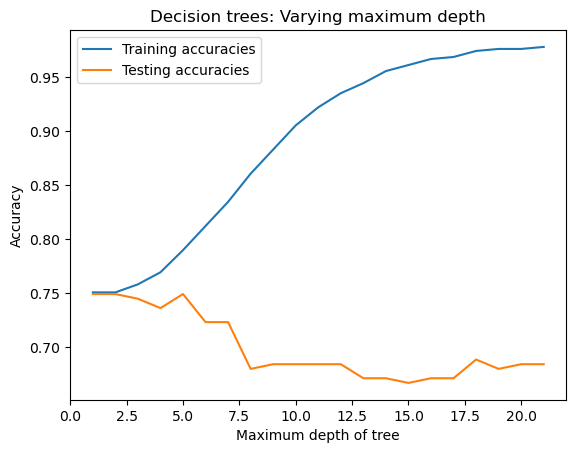

In [42]:
fig, ax = plt.subplots()
ax.plot(depth, train_accuracies2.values(), 
        label='Training accuracies')
ax.plot(depth, test_accuracies2.values(), 
        label='Testing accuracies')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision trees: Varying maximum depth')
plt.legend()
plt.show()

In [43]:
dt2 = DecisionTreeClassifier(max_depth=5, random_state=290)
dt2.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=5, random_state=290)

In [44]:
dt2.score(X_train2, y_train2)

0.7895716945996276

In [45]:
dt2.score(X_test2, y_test2)

0.7489177489177489

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


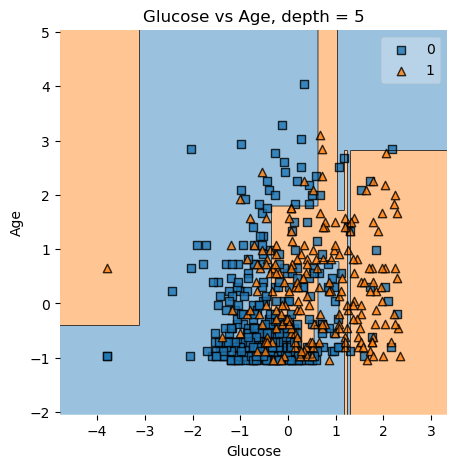

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
plot_decision_regions(X_train2.values, 
                      y_train2.values, 
                      clf=dt2, legend=1, ax=ax)

ax.set_xlabel('Glucose')
ax.set_ylabel('Age')
plt.title('Glucose vs Age, depth = 5')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


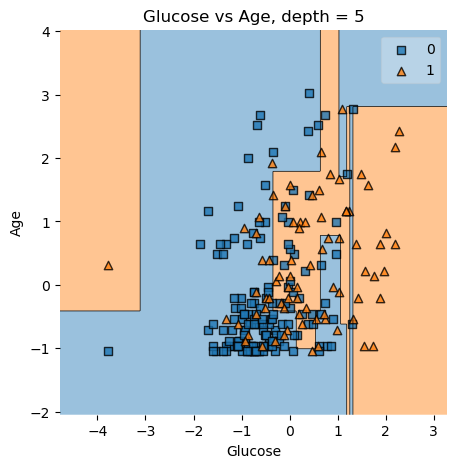

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
plot_decision_regions(X_test2.values, 
                      y_test2.values, 
                      clf=dt2, legend=1, ax=ax)

ax.set_xlabel('Glucose')
ax.set_ylabel('Age')
plt.title('Glucose vs Age, depth = 5')
plt.show()

# Part 3: Predicting sprint times

In [6]:
#1
'''
We will use a decision tree model to predict 40 yd sprint time from weight and height using data from the 2009-2019 NFL drafts. 
Load the data contained in 'NFL_draft_combine_2009_2019.csv'. 
Use \textit{nfl = nfl.dropna(subset='Sprint_40yd', axis=0)} to drop the rows with no values for 'Sprint_40yd'.
Define X to be the weight and height columns and y as the 'Sprint_40yd' column. Make a train-test split.
'''
nfl = pd.read_csv('NFL_draft_combine_2009_2019.csv')
nfl

,Year,Player,Age,School,Height,Weight,Weight(lbs),Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,234.999721,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,260.999690,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,363.999567,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,202.999759,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,243.999710,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Derrick Baity\BaitDe00,NaN,Kentucky,1.8796,89.357697,196.999766,NaN,97.79,10.0,322.58,7.06,4.31,NaN,25.293044,defense,defensive_back,CB,No
3473,2018,Minkah Fitzpatrick\FitzMi00,21.0,Alabama,1.8542,91.172066,200.999761,4.46,83.82,14.0,307.34,NaN,NaN,Miami Dolphins / 1st / 11th pick / 2018,26.518481,defense,defensive_back,DB,Yes
3474,2018,Quenton Meeks\MeekQu00,21.0,Stanford,1.8796,92.986436,204.999756,NaN,99.06,11.0,325.12,6.72,4.23,NaN,26.320172,defense,defensive_back,DB,No
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,198.999763,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No


In [7]:
nfl = nfl.dropna(subset='Sprint_40yd', axis=0)

In [50]:
nfl

,Year,Player,Age,School,Height,Weight,Weight(lbs),Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,234.999721,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,260.999690,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,363.999567,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,202.999759,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,243.999710,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,2019,Tytus Howard,NaN,Alabama St.,1.9558,146.056743,321.999617,5.05,74.93,21.0,261.62,8.34,4.87,NaN,38.183236,offense,offensive_lineman,OT,No
3469,2019,Chauncey Gardner-Johnson,NaN,Florida,1.8034,95.254398,209.999750,4.48,91.44,17.0,297.18,7.03,4.20,NaN,29.288755,defense,defensive_back,S,No
3470,2019,Ashton Dulin,NaN,Malone University (Ohio),1.8542,97.522360,214.999744,4.43,96.52,13.0,307.34,7.00,4.22,NaN,28.365539,offense,backs_receivers,WR,No
3473,2018,Minkah Fitzpatrick\FitzMi00,21.0,Alabama,1.8542,91.172066,200.999761,4.46,83.82,14.0,307.34,NaN,NaN,Miami Dolphins / 1st / 11th pick / 2018,26.518481,defense,defensive_back,DB,Yes


In [8]:
X3 = nfl[['Height', 'Weight']]
y3 = nfl['Sprint_40yd']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=440) 
y_train3

1011    5.06
773     4.65
2610    4.52
3215    5.35
267     5.19
        ... 
2019    4.89
368     4.81
1087    4.58
3202    4.93
1110    4.49
Name: Sprint_40yd, Length: 2312, dtype: float64

In [9]:
scaler = StandardScaler()
X_train3 = pd.DataFrame(scaler.fit_transform(X_train3), columns = ['Height', 'Weight'])
X_test3 = pd.DataFrame(scaler.transform(X_test3), columns = ['Height', 'Weight'])
dt3 = DecisionTreeRegressor(random_state=290)

In [10]:
dt3.fit(X_train3, y_train3)

DecisionTreeRegressor(random_state=290)

In [11]:
dt3.score(X_train3, y_train3)

0.8556582893313802

In [12]:
dt3.score(X_test3, y_test3)

0.631581743488407

In [13]:
dt3.get_depth()

25

In [15]:
#2
'''
Use decision trees with max depth = 2, 3, ..., 15 and record the scores for the training set and the test set. 
Make a visualization of these scores.
'''

train_accuracies3 = {}
test_accuracies3 = {}
depth = range(1,16)
for n in depth:
    clf = DecisionTreeRegressor(max_depth = n, random_state=290)
    clf.fit(X_train3, y_train3)
    train_accuracies3[n] = clf.score(X_train3, y_train3)
    test_accuracies3[n] = clf.score(X_test3, y_test3)
    

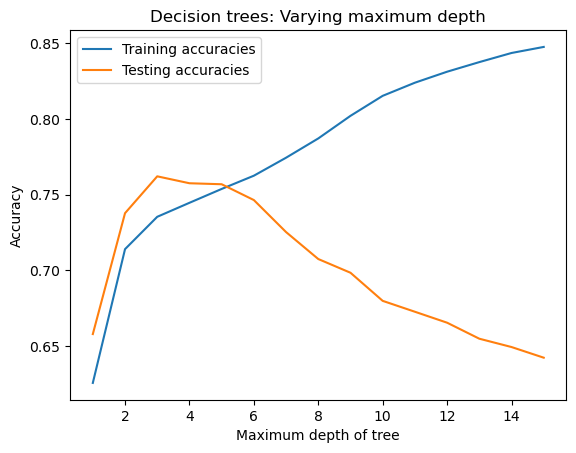

In [16]:
fig, ax = plt.subplots()
ax.plot(depth, train_accuracies3.values(), 
        label='Training accuracies')
ax.plot(depth, test_accuracies3.values(), 
        label='Testing accuracies')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision trees: Varying maximum depth')
plt.legend()
plt.show()

In [102]:
'''
3. Based on your work in 3, set the maximum depth and train a model with your training data. Check the r-squared score on both 
the training set and the test set.

4. Make a dataframe showing the importance of each feature using feature_importances_. What feature is the most important in this tree?
'''
#3
dt3 = DecisionTreeRegressor(max_depth=3, random_state=290)
dt3.fit(X_train3, y_train3)

DecisionTreeRegressor(max_depth=3, random_state=290)

In [103]:
dt3.score(X_train3, y_train3)

0.7354191712396791

In [104]:
dt3.score(X_test3, y_test3)

0.7621291872138003

In [105]:
#4
feat_imp2 = pd.DataFrame(X_train3.columns, columns=['feature'])
feat_imp2['importance'] = dt3.feature_importances_
feat_imp2 = feat_imp2.sort_values(by='importance', ascending=False)
feat_imp2
#The most important fearture is Weight, at least for when I have the decision tree depth set to 3

,feature,importance
1,Weight,1.0
0,Height,0.0


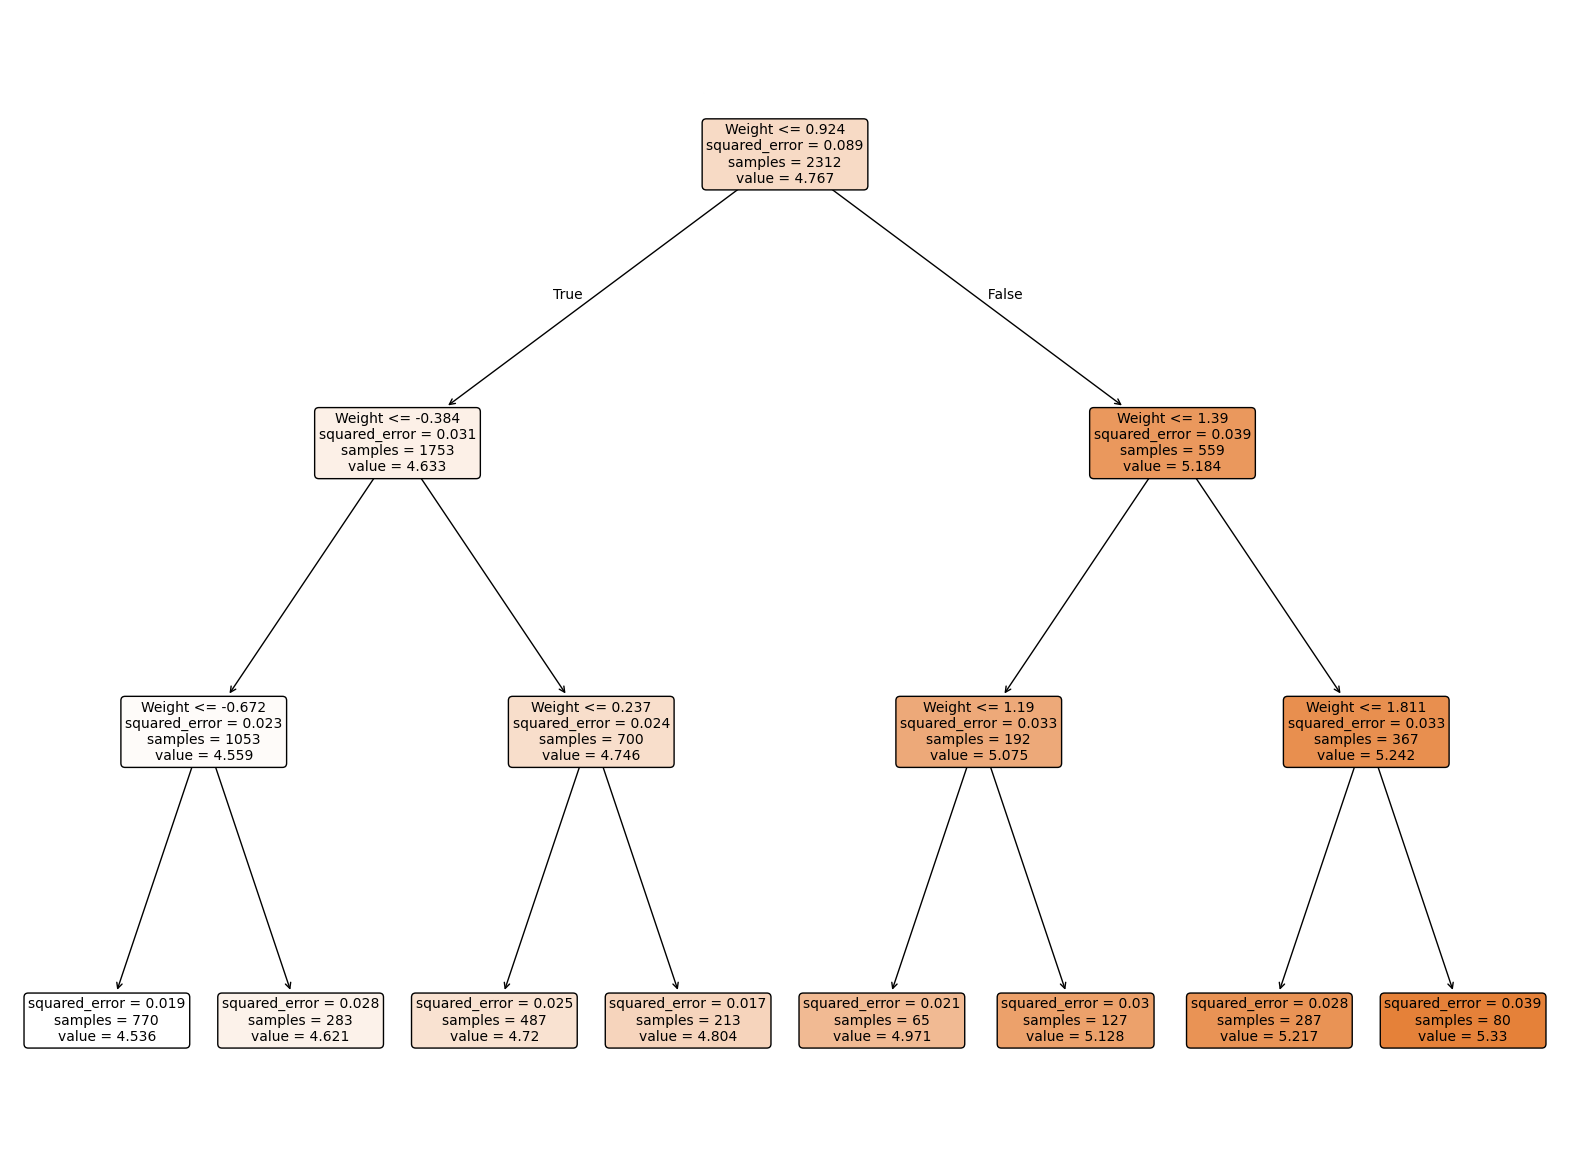

In [112]:
plt.figure(figsize=(20, 15))
plot_tree(dt3, 
          feature_names=['Height', 'Weight'],  
          filled=True, 
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.show()